## Import packages

In [1]:
from glob import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
plt.style.use('ggplot')

## Load dataset

In [30]:
file_path = glob('./*csv')[0]
df = pd.read_csv(file_path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [14]:
len(df['ID'].unique())    # No duplicate customer

2240

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [82]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Join_Month,Join_Year,Age
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,6.467411,2013.028125,45.194196
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,3.486695,0.684554,11.984069
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,18.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2013.000000,37.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2013.000000,44.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2013.000000,55.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2014.000000,121.000000


In [44]:
df.describe(include=['O'])

,Education,Marital_Status,Country
count,2240,2240,2240
unique,5,8,8
top,Graduation,Married,SP
freq,1127,864,1095


## Data preprocess

In [32]:
# Income
df = df.rename(columns={' Income ': 'Income'})

df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype('float')

In [38]:
# Customer Join Date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Join_Month'] = df['Dt_Customer'].dt.month
df['Join_Year'] = df['Dt_Customer'].dt.year

In [45]:
# Age
df['Age'] = 2014 - df['Year_Birth']

In [50]:
# Drop ID
df = df.drop('ID', axis=1)

In [140]:
# Sum purchases
df['Total_Purchases'] = df.loc[:, [col for col in df.columns if 'Purchases' in col]].sum(axis=1)

## Exploratory data analysis

In [55]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_Month',
       'Join_Year', 'Age'],
      dtype='object')

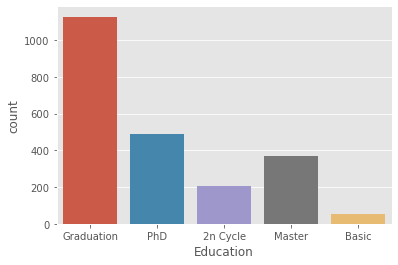

In [54]:
# Education
sns.countplot(data=df, x='Education')

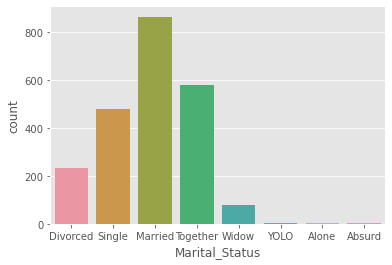

In [58]:
# Marital_Status
sns.countplot(data=df, x='Marital_Status')

666666.0

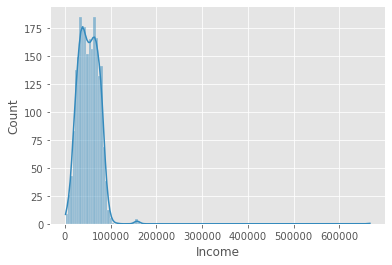

In [64]:
# Income
sns.histplot(data=df, x='Income', kde=True)
df['Income'].max()

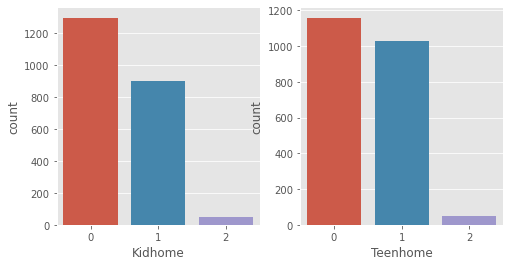

In [69]:
# Kidhome, Teenhome
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.countplot(data=df, x='Kidhome', ax=ax[0])
sns.countplot(data=df, x='Teenhome', ax=ax[1])

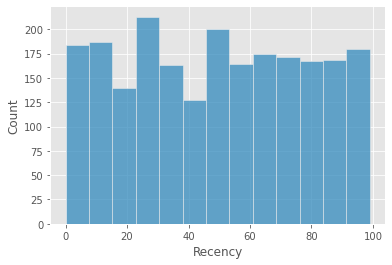

In [76]:
# Recency
sns.histplot(data=df, x='Recency')    # Quite normal

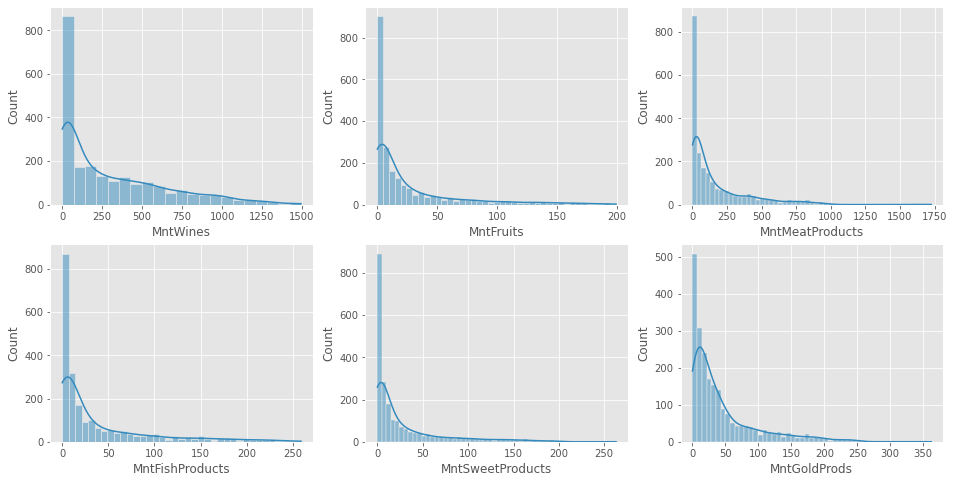

In [79]:
# Nums of product purchased
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

mnt_cols = [col for col in df.columns if 'Mnt' in col]

count = 0
for i in range(2):
    for j in range(3):
        sns.histplot(data=df, x=mnt_cols[count], ax=ax[i][j], kde=True)
        count += 1

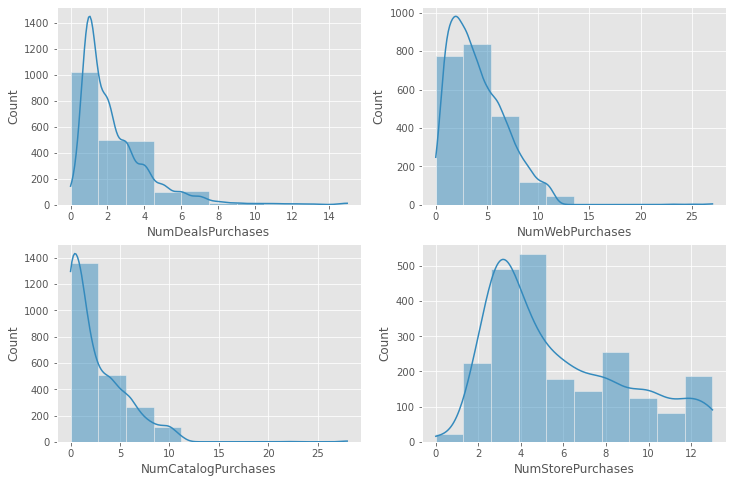

In [86]:
# Purchases
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))

purchases_cols = [col for col in df.columns if 'Purchases' in col]

count = 0
for i in range(2):
    for j in range(2):
        sns.histplot(data=df, x=purchases_cols[count], ax=ax[i][j], kde=True, bins=10)
        count += 1

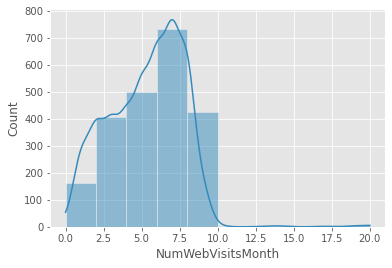

In [85]:
# NumWebVisitsMonth
sns.histplot(data=df, x='NumWebVisitsMonth', kde=True, bins=10)

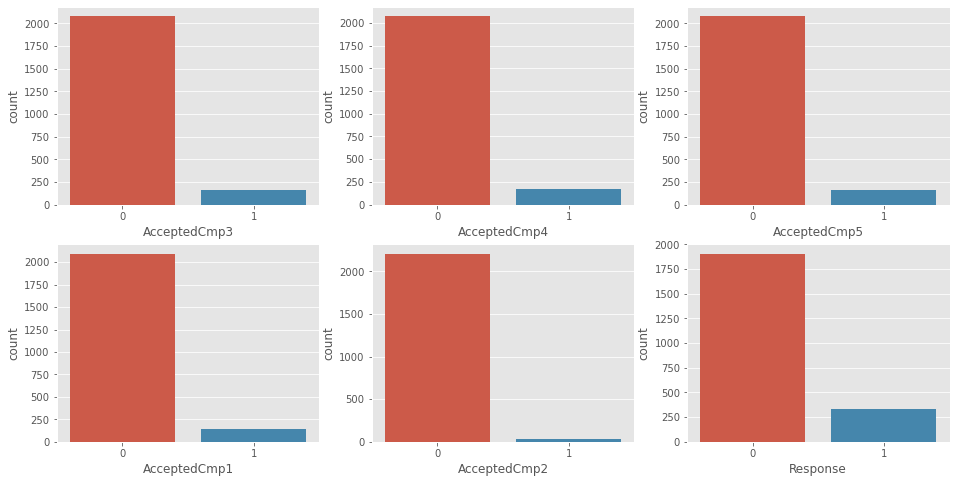

In [91]:
# Campaign
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

cmp_cols = [col for col in df.columns if 'Cmp' in col]
cmp_cols.append('Response')

count = 0
for i in range(2):
    for j in range(3):
        sns.countplot(data=df, x=cmp_cols[count], ax=ax[i][j])
        count += 1

0    2219
1      21
Name: Complain, dtype: int64

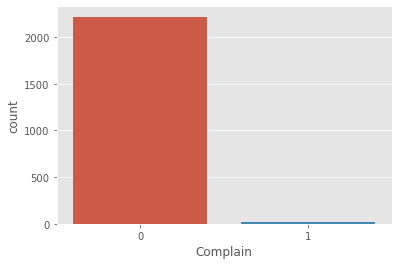

In [95]:
# Complain
sns.countplot(data=df, x='Complain')
df['Complain'].value_counts()

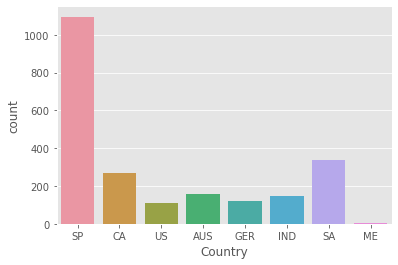

In [96]:
sns.countplot(data=df, x='Country')

## Statistical analysis

### 1. What factors are significantly related to the number of store purchases?

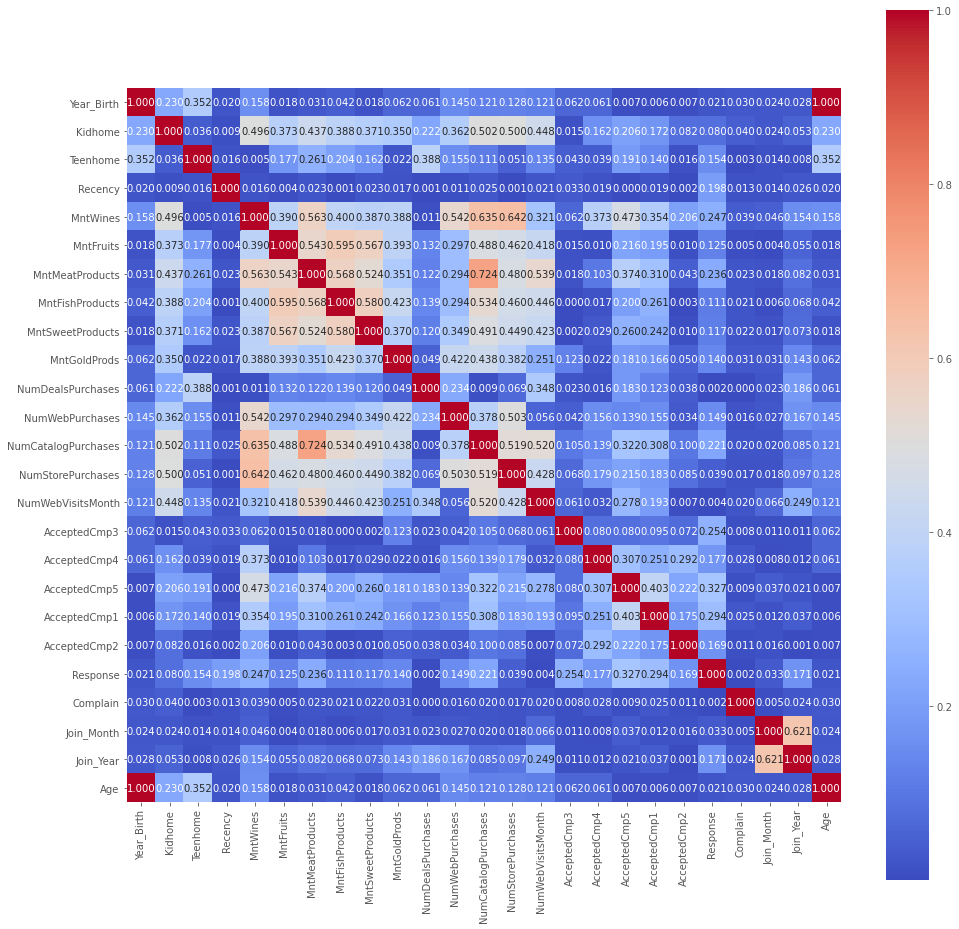

In [120]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(data=df.select_dtypes(include='int64').corr().abs(), 
            annot=True, fmt='.3f',cmap='coolwarm',square=True)

In [130]:
df.select_dtypes(include='int64').corr().abs()['NumStorePurchases'].sort_values(ascending=False).head()

NumStorePurchases      1.000000
MntWines               0.642100
NumCatalogPurchases    0.518738
NumWebPurchases        0.502713
Kidhome                0.499683
Name: NumStorePurchases, dtype: float64

**Amount spend on wine products** are highly correlated with **number of store purchases**, with correlation of 0.64.

### Does US fare significantly better than the Rest of the World in terms of total purchases?

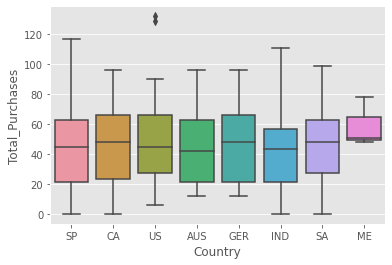

In [142]:
sns.boxplot(data=df, x='Country', y='Total_Purchases')

With the boxplot we can find out that total purchases in most countries are nearly similar except for ME since ME has less values. However, there're some outliers in US with higher purchases.

In [153]:
df.pivot_table(values='Total_Purchases', index='Country').sort_values(by='Total_Purchases', ascending=False)#

,Total_Purchases
Country,
ME,59.000000
US,48.467890
CA,45.906716
SA,45.551929
GER,44.700000
SP,43.978082
AUS,43.387500
IND,42.547297


In [161]:
# One way ANOVA
import scipy.stats as st

f_value, p_value = st.f_oneway(df[df['Country'] == 'ME']['Total_Purchases'],
                               df[df['Country'] == 'US']['Total_Purchases'],
                               df[df['Country'] == 'CA']['Total_Purchases'],
                               df[df['Country'] == 'SA']['Total_Purchases'],
                               df[df['Country'] == 'GER']['Total_Purchases'],
                               df[df['Country'] == 'SP']['Total_Purchases'],
                               df[df['Country'] == 'AUS']['Total_Purchases'],
                               df[df['Country'] == 'IND']['Total_Purchases'])
p_value

0.32363123497093704

With ANOVA, it's clear that there are no significant different in total purchases between each country.

### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

In [187]:
df['MntGoldProds_aboveAvg'] = df['MntGoldProds'] > df['MntGoldProds'].mean()
df['MntGoldProds_aboveAvg'] = df['MntGoldProds_aboveAvg'].astype('int')

df.pivot_table(values='NumStorePurchases', index='MntGoldProds_aboveAvg')

,NumStorePurchases
MntGoldProds_aboveAvg,
0,4.903622
1,7.765130


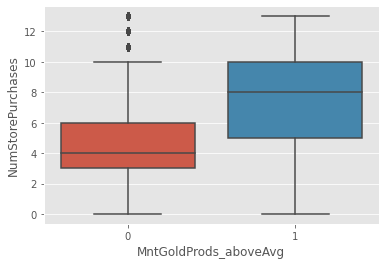

In [188]:
sns.boxplot(data=df, x='MntGoldProds_aboveAvg', y='NumStorePurchases')

In [184]:
f_value, p_value = st.f_oneway(df[df['MntGoldProds_aboveAvg'] == 1]['NumStorePurchases'],
                               df[df['MntGoldProds_aboveAvg'] == 0]['NumStorePurchases']
                              )
if p_value < 0.05:
    print('''Reject null hypothesis, indicating that those who spent an above average amount on gold would have more in store purchases.
        ''')

Reject null hypothesis, indicating that those we spent an above average amount on gold would have more in store purchases.
        


### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)

,MntFishProducts
Education,
2n Cycle,47.482759
Graduation,43.149956
Master,32.100000
PhD,26.728395
Basic,17.055556


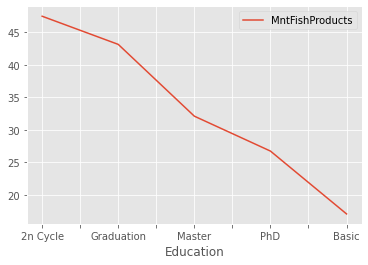

In [205]:
mntfish_edu = df.pivot_table(values='MntFishProducts', index='Education').sort_values(by = 'MntFishProducts', ascending=False)
mntfish_edu.plot()
mntfish_edu

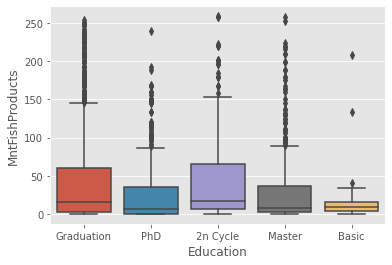

In [191]:
sns.boxplot(data=df, x='Education', y='MntFishProducts')

In [199]:
f_value, p_value = st.f_oneway(df[df['Education'] == 'Graduation']['MntFishProducts'],
                               df[df['Education'] == 'PhD']['MntFishProducts'], 
                               df[df['Education'] == '2n Cycle']['MntFishProducts'], 
                               df[df['Education'] == 'Master']['MntFishProducts'], 
                               df[df['Education'] == 'Basic']['MntFishProducts'], 
                              )
if p_value < 0.05:
    print('p-value: {:.4f}'.format(p_value))
    print('''Reject null hypothesis, indicating that those who spent an above average amount on gold would have more in store purchases.
        ''')

p-value: 0.0000
Reject null hypothesis, indicating that those who spent an above average amount on gold would have more in store purchases.
        


### Is there a significant relationship between geographical regional and success of a campaign? 

In [218]:
country_response_pivot = df.pivot_table(values='Response', index='Country', aggfunc=sum)
country_response_pivot.columns = ['Success']

country_response_pivot['Fail'] = df.pivot_table(values='Response', index='Country', aggfunc = lambda x: len(x) - sum(x))
# country_response_pivot['Total'] = df.pivot_table(values='Response', index='Country', aggfunc = lambda x: len(x))
country_response_pivot

,Success,Fail
Country,,
AUS,23,137
CA,38,230
GER,17,103
IND,13,135
ME,2,1
SA,52,285
SP,176,919
US,13,96


In [224]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(country_response_pivot)
print('P-value: {:2f}'.format(p))

P-value: 0.074151


Take response as the campaign, with the chi-squared test, we can find out the there's no significant relationship between geographical regional and success of a campaign since the p-value of the chi2 test > 0.05.

## Data Visualiation

### Which marketing campaign is most successful?

In [269]:
cmp_cols = [col for col in df.columns if 'Cmp' in col]
cmp_cols.append('Response')
df_cmp = df.loc[:, cmp_cols]

df_cmp = pd.DataFrame({'Percentage': df_cmp.sum() / len(df_cmp)})
df_cmp = df_cmp.reset_index().sort_values(by='Percentage', ascending=False)
df_cmp

,index,Percentage
5,Response,0.149107
1,AcceptedCmp4,0.074554
0,AcceptedCmp3,0.072768
2,AcceptedCmp5,0.072768
3,AcceptedCmp1,0.064286
4,AcceptedCmp2,0.013393


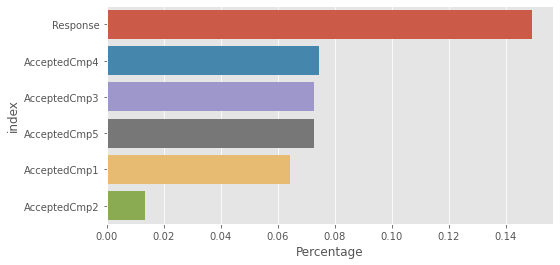

In [268]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=df_cmp, x='Percentage', y='index')

Response is the best campaign with participate percentage by 15%.

### What does the average customer look like for this company?

In [273]:
df.describe().loc['mean', ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency']]

Age            45.194196
Income      52247.251354
Kidhome         0.444196
Teenhome        0.506250
Recency        49.109375
Name: mean, dtype: float64

### Which products are performing best?

In [283]:
mnt_cols = [col for col in df.columns if 'Mnt' in col and '_' not in col]

df_product = (pd.DataFrame({'Total_Products': df.loc[:, mnt_cols].sum()})).sort_values(by='Total_Products', ascending=False).reset_index()
df_product

,index,Total_Products
0,MntWines,680816
1,MntMeatProducts,373968
2,MntGoldProds,98609
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntFruits,58917


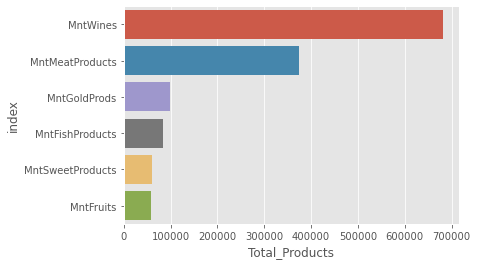

In [284]:
sns.barplot(data=df_product, x='Total_Products', y='index')

Wine sales the best of all products, followed by meat.

### Which channels are underperforming?

In [287]:
purchases_cols = [col for col in df.columns if 'Purchases' in col and 'Total' not in col]
# df_channel = df.loc[:, purchases_cols]

df_channel = (pd.DataFrame({'Total_Purchases': df.loc[:, purchases_cols].sum()})).sort_values(by='Total_Purchases', ascending=False).reset_index()
df_channel

,index,Total_Purchases
0,NumStorePurchases,12970
1,NumWebPurchases,9150
2,NumCatalogPurchases,5963
3,NumDealsPurchases,5208


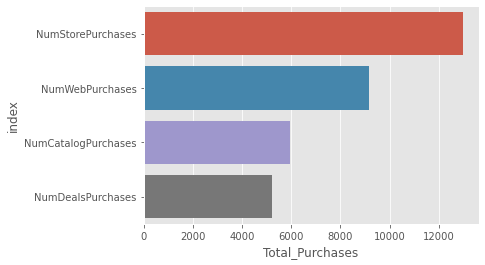

In [288]:
sns.barplot(data=df_channel, x='Total_Purchases', y='index')